In [1]:
#%matplotlib notebook

In [2]:
import tiktoken
import datasets

In [3]:
tokeniser = tiktoken.encoding_for_model("gpt2")

In [4]:
data = datasets.load_dataset("CarperAI/openai_summarize_tldr")

Using custom data configuration CarperAI--openai_summarize_tldr-f034e31da7ead473
Reusing dataset parquet (/home/will/.cache/huggingface/datasets/parquet/CarperAI--openai_summarize_tldr-f034e31da7ead473/0.0.0/1638526fd0e8d960534e2155dc54fdff8dce73851f21f031d2fb9c2cf757c121)


  0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
train_df = data['train'].to_pandas()

In [6]:
train_df["prompt_token_length"] = train_df.prompt.apply(lambda p: len(tokeniser.encode(p)))
train_df["prompt_str_length"] = train_df.prompt.apply(lambda p: len(p))
train_df["label_token_length"] = train_df.label.apply(lambda p: len(tokeniser.encode(p)))
train_df["label_str_length"] = train_df.label.apply(lambda p: len(p))


<IPython.core.display.Javascript object>


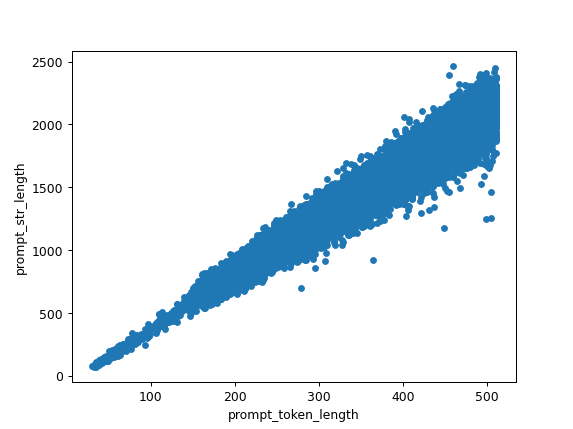

/home/will/code/preference-learning/venv/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='prompt_token_length', ylabel='prompt_str_length'>

In [7]:
train_df.plot.scatter(x='prompt_token_length', y='prompt_str_length')

<IPython.core.display.Javascript object>


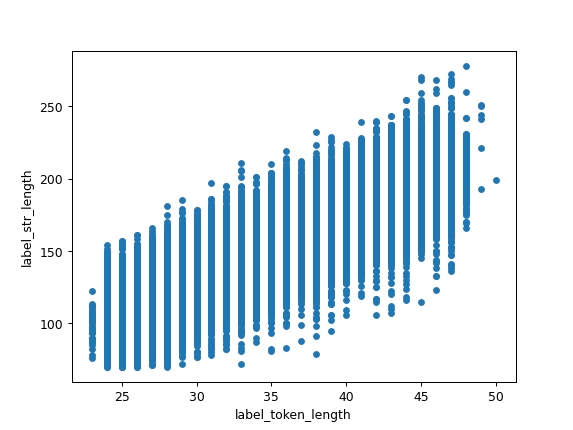

<AxesSubplot: xlabel='label_token_length', ylabel='label_str_length'>

In [8]:
train_df.plot.scatter(x='label_token_length', y='label_str_length')

In [9]:
train_df["prompt_token_length"].max()

510

In [19]:
set(train_df.prompt.apply(lambda p: p.split("\n")[0].split()[1].split("/")[1]))

{'Advice',
 'AskDocs',
 'AskReddit',
 'BreakUps',
 'Cooking',
 'Dogtraining',
 'GetMotivated',
 'Parenting',
 'Pets',
 'askwomenadvice',
 'books',
 'cats',
 'college',
 'dating_advice',
 'dogs',
 'jobs',
 'legaladvice',
 'loseit',
 'needadvice',
 'offmychest',
 'personalfinance',
 'pettyrevenge',
 'relationship_advice',
 'relationships',
 'running',
 'self',
 'tifu',
 'travel',
 'weddingplanning'}

In [16]:
import re

In [21]:
dataset = datasets.load_dataset("CarperAI/openai_summarize_tldr")['train']

Using custom data configuration CarperAI--openai_summarize_tldr-f034e31da7ead473
Reusing dataset parquet (/home/will/.cache/huggingface/datasets/parquet/CarperAI--openai_summarize_tldr-f034e31da7ead473/0.0.0/1638526fd0e8d960534e2155dc54fdff8dce73851f21f031d2fb9c2cf757c121)


  0%|          | 0/3 [00:00<?, ?it/s]

In [22]:
AVOID_SUBREDDITS = set("dating_advice relationship_advice relationships breakups offmychest tifu".split())
dataset = dataset.filter(
    lambda x: x["prompt"].split("\n")[0].split()[1].split("/")[1].lower() not in AVOID_SUBREDDITS,
    batched=False)

Parameter 'function'=<function <lambda> at 0x7f811a03caf0> of the transform datasets.arrow_dataset.Dataset.filter@2.0.1 couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


  0%|          | 0/117 [00:00<?, ?ba/s]

In [27]:
set(dataset.to_pandas()['prompt'].apply(lambda p: p.split("\n")[0].split()[1].split("/")[1]))


{'Advice',
 'AskDocs',
 'AskReddit',
 'Cooking',
 'Dogtraining',
 'GetMotivated',
 'Parenting',
 'Pets',
 'askwomenadvice',
 'books',
 'cats',
 'college',
 'dogs',
 'jobs',
 'legaladvice',
 'loseit',
 'needadvice',
 'personalfinance',
 'pettyrevenge',
 'running',
 'self',
 'travel',
 'weddingplanning'}